In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
class TrainCrash:
    def __init__(self):
        self.data = pd.read_csv("TrainData.csv")
    def clean_data(self):
        print("The original data has",len(self.data),"records")
        self.data.dropna(inplace=True)
        self.data.dropna(subset=['survived'], inplace=True)
        self.data['age'].fillna(self.data['age'].median(), inplace=True)
        print("The new data now has", len(self.data),"records")
    def get_cleaned_data_count(self):
        return len(self.data)
    
    def most_picked_station(self):
        return self.data['station'].mode()[0]
    
    def explore_data(self):
        print("Head:")
        print(self.data.head())
        print("\nInfo:")
        print(self.data.info())
        print("\nDescription:")
        print(self.data.describe())
        print("\nNumber of unique values for each column:")
        print(self.data.nunique())
        print("\nNumber of rows of columns")
        print(self.data.shape)
        print("\nData for the particular row")
        print(train.data.iloc[19])
        
        
    def remove_outliers(self):
        numerical_columns = self.data.select_dtypes(include=['int64', 'float64']).columns
        for column in numerical_columns:
            Q1 = self.data[column].quantile(0.25)
            Q3 = self.data[column].quantile(0.75)
            IQR = Q3 - Q1
            self.data = self.data[~((self.data[column] < (Q1 - 1.5 * IQR)) | (self.data[column] > (Q3 + 1.5 * IQR)))]
            
    def partition_data(self):
        X = self.data.drop('survived', axis=1)
        y = self.data['survived']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)
        return X_train, X_test, y_train, y_test
    
    
    def build_knn_model(self, X_train, X_test, y_train, y_test):
        X_train_encoded = pd.get_dummies(X_train, drop_first=True)
        X_test_encoded = pd.get_dummies(X_test, drop_first=True)
        best_k = None
        best_accuracy = 0
        for k in range(1, 21):  # Try values of k from 1 to 20
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train_encoded, y_train)
            y_pred = knn.predict(X_test_encoded)
            accuracy = accuracy_score(y_test, y_pred)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_k = k
        print("Best k:", best_k)
        print("Best accuracy:", best_accuracy)
        final_knn = KNeighborsClassifier(n_neighbors=best_k)
        final_knn.fit(X_train_encoded, y_train)
        y_pred_final = final_knn.predict(X_test_encoded)
        final_accuracy = accuracy_score(y_test, y_pred_final)
        print("Final accuracy with best k:", final_accuracy)
        
        
    def build_logistic_regression_model(self, X_train, X_test, y_train, y_test):
        X_train_encoded = pd.get_dummies(X_train, drop_first=True)
        X_test_encoded = pd.get_dummies(X_test, drop_first=True)
        log_reg = LogisticRegression(max_iter=1000)
        log_reg.fit(X_train_encoded, y_train)
        y_pred = log_reg.predict(X_test_encoded)
        accuracy = accuracy_score(y_test, y_pred)
        print("Accuracy for Logistic Regression:", accuracy)
    
    def build_decision_tree_model(self, X_train, X_test, y_train, y_test):
        X_train_encoded = pd.get_dummies(X_train)
        X_test_encoded = pd.get_dummies(X_test)
        tree = DecisionTreeClassifier(max_depth=7)
        tree.fit(X_train_encoded, y_train)
        y_pred = tree.predict(X_test_encoded)
        accuracy = accuracy_score(y_test, y_pred)
        print("Accuracy for Decision Tree:", accuracy)
        
    def plot_data(self):
        sns.pairplot(self.data, hue='survived', diag_kind='kde')
        sns.set_style("whitegrid")

       
        plt.figure(figsize=(8, 6))
        sns.barplot(self.data,x='pclass', y='survived',  palette='pastel')
        plt.title('Survival Rate by Passenger Class')
        plt.xlabel('Passenger Class')
        plt.ylabel('Survival Rate')
        plt.show()

       
        plt.figure(figsize=(8, 6))
        sns.barplot(data=self.data, x='sex', y='survived', palette='pastel')
        plt.title('Survival Rate by Sex')
        plt.xlabel('Sex')
        plt.ylabel('Survival Rate')
        plt.show()

       
        plt.figure(figsize=(10, 6))
        sns.histplot(data=self.data, x='age', hue='survived', multiple='stack', kde=True, palette='pastel')
        plt.title('Survival Distribution by Age')
        plt.xlabel('Age')
        plt.ylabel('Count')
        plt.show()

        
        plt.figure(figsize=(8, 6))
        sns.barplot(x='station', y='survived', data=self.data, palette='pastel')
        plt.title('Survival Rate by Port of Embarkation/Station')
        plt.xlabel('Port of Embarkation')
        plt.ylabel('Survival Rate')
        plt.show()

       
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        sns.barplot(x='sibsp', y='survived', data=self.data, palette='pastel')
        plt.title('Survival Rate by Siblings/Spouses')
        plt.xlabel('Number of Siblings/Spouses')
        plt.ylabel('Survival Rate')

        plt.subplot(1, 2, 2)
        sns.barplot(x='parch', y='survived', data=self.data, palette='pastel')
        plt.title('Survival Rate by Parents/Children')
        plt.xlabel('Number of Parents/Children')
        plt.ylabel('Survival Rate')

        
        plt.figure(figsize=(10, 6))
        sns.barplot(x='pclass', y='survived', hue='sex', data=self.data, palette='pastel')
        plt.title('Survival Rate by Passenger Class and Sex')
        plt.xlabel('Passenger Class')
        plt.ylabel('Survival Rate')
        plt.show()

        
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='pclass', y='fare', hue='survived', data=self.data, palette='pastel')
        plt.title('Fare Distribution by Passenger Class and Survival')
        plt.xlabel('Passenger Class')
        plt.ylabel('Fare')
        plt.show()

        
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='survived', y='age', data=self.data, palette='pastel')
        plt.title('Age Distribution by Survival')
        plt.xlabel('Survived')
        plt.ylabel('Age')
        plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
        plt.show()

        plt.tight_layout()
        plt.show()

In [72]:
train = TrainCrash()
train.clean_data()
cleaned_count = train.get_cleaned_data_count()
print()
print(train.data.iloc[19])

The original data has 891 records
The new data now has 712 records

survived         1
pclass           3
sex         female
age           15.0
sibsp            0
parch            0
fare        8.0292
station          Q
Name: 22, dtype: object


In [73]:
# Task 2: Find the station with the most passengers
most_picked_station = train.most_picked_station()
print("Most picked station:", most_picked_station)

Most picked station: S


In [74]:

train.explore_data()


Head:
   survived  pclass     sex   age  sibsp  parch     fare station
0         0       3    male  22.0      1      0   7.2500       S
1         1       1  female  38.0      1      0  71.2833       C
2         1       3  female  26.0      0      0   7.9250       S
3         1       1  female  35.0      1      0  53.1000       S
4         0       3    male  35.0      0      0   8.0500       S

Info:
<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    object 
 3   age       712 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   fare      712 non-null    float64
 7   station   712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB
None

Description:
         survived      pcl

In [75]:

train.remove_outliers()

In [76]:

X_train, X_test, y_train, y_test = train.partition_data()


In [77]:

train.build_knn_model(X_train, X_test, y_train, y_test)

Best k: 13
Best accuracy: 0.7121212121212122
Final accuracy with best k: 0.7121212121212122


In [78]:
 
train.build_logistic_regression_model(X_train, X_test, y_train, y_test)

Accuracy for Logistic Regression: 0.75


In [79]:
# Task 8: Build the decision tree model
train.build_decision_tree_model(X_train, X_test, y_train, y_test)


Accuracy for Decision Tree: 0.7651515151515151


In [80]:
print("The accuracy for Knn with best K value is")
accuracy1=train.build_knn_model(X_train, X_test, y_train, y_test)
print("\n\nThe accuracy using logistic regression is ")
accuracy2=train.build_logistic_regression_model(X_train, X_test, y_train, y_test)

The accuracy for Knn with best K value is
Best k: 13
Best accuracy: 0.7121212121212122
Final accuracy with best k: 0.7121212121212122


The accuracy using logistic regression is 
Accuracy for Logistic Regression: 0.75


In [81]:
print("""
From the output provided for the accuracy scores of both the k-nearest neighbor (KNN) and logistic regression models, 
it appears that the logistic regression model has a higher accuracy score compared to the KNN model's best score. 
Logistic regression is performing better and it could be considered the best model for this particular 
classification task based on your results.
""")



From the output provided for the accuracy scores of both the k-nearest neighbor (KNN) and logistic regression models, 
it appears that the logistic regression model has a higher accuracy score compared to the KNN model's best score. 
Logistic regression is performing better and it could be considered the best model for this particular 
classification task based on your results.



C:\Users\rafay\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


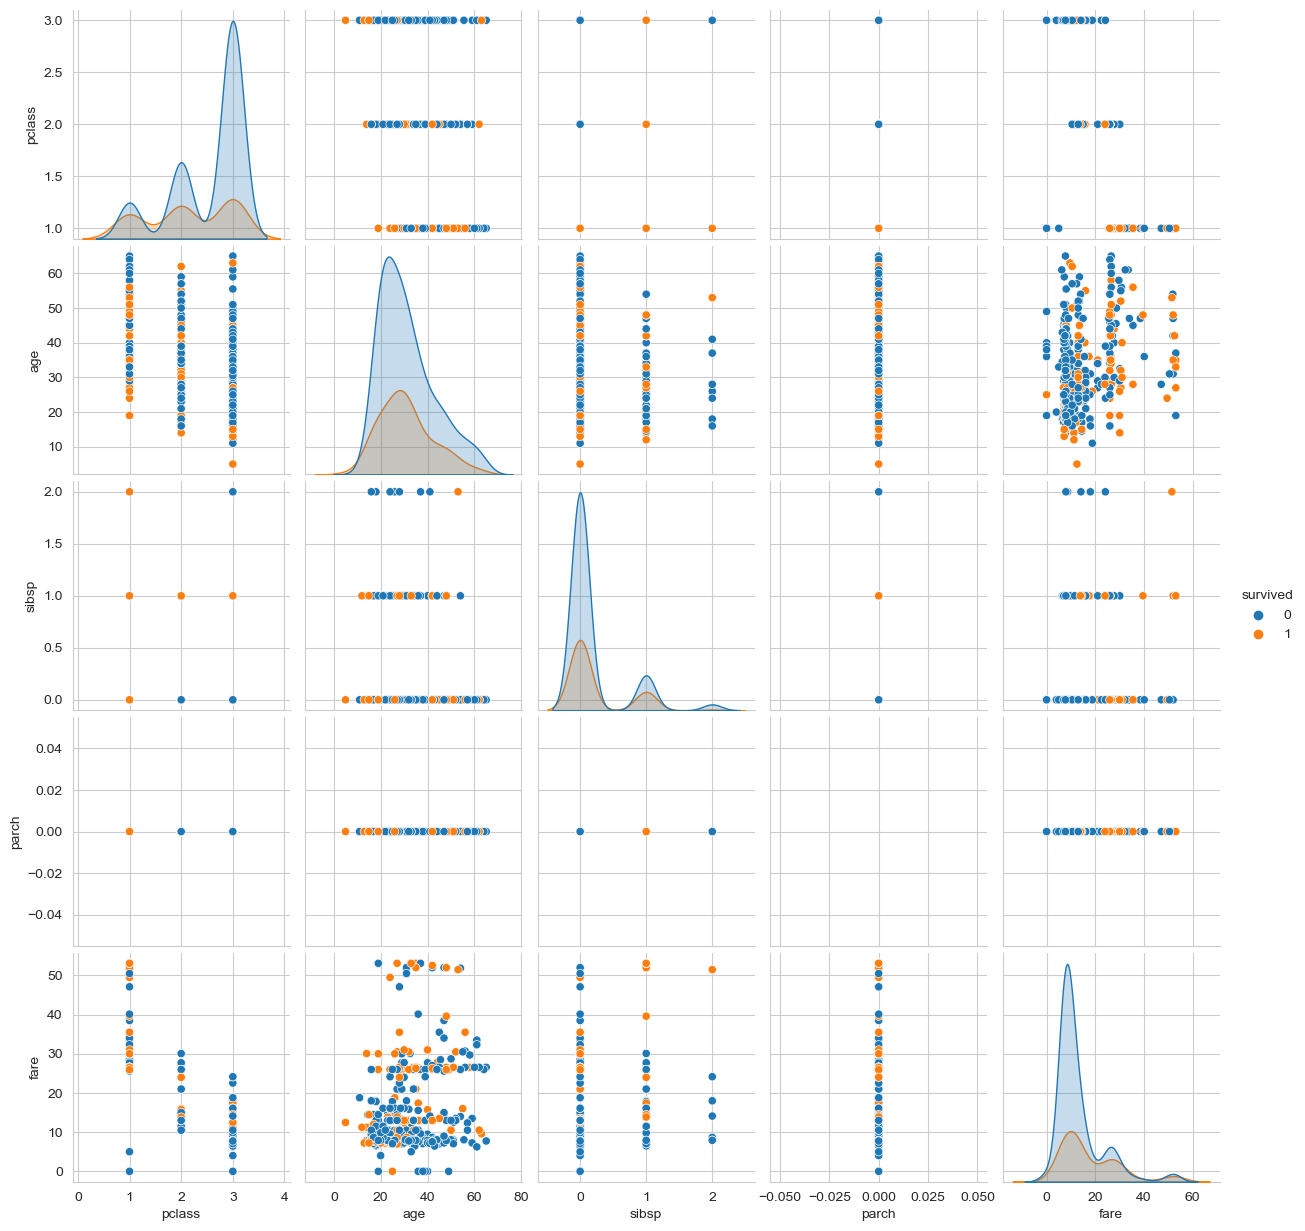

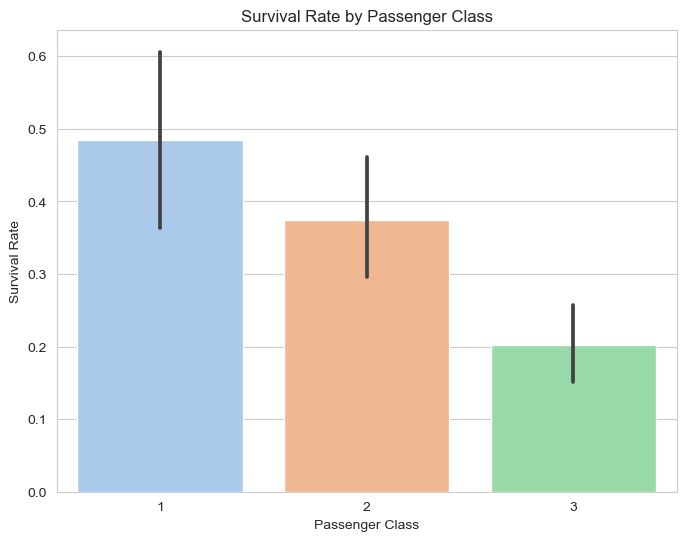

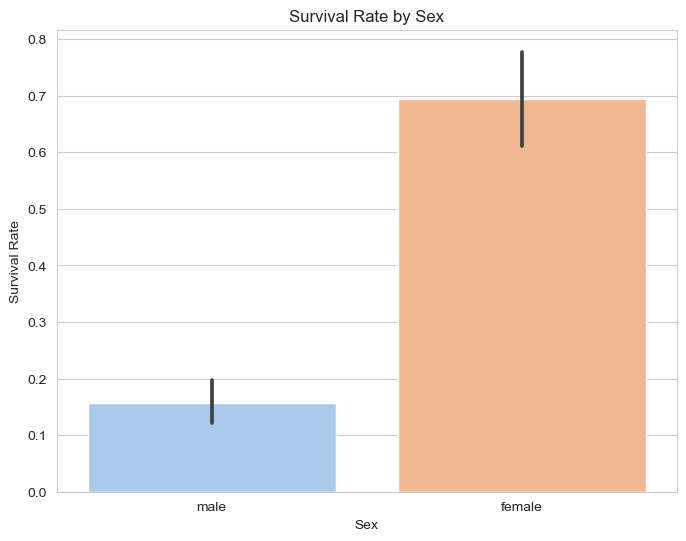

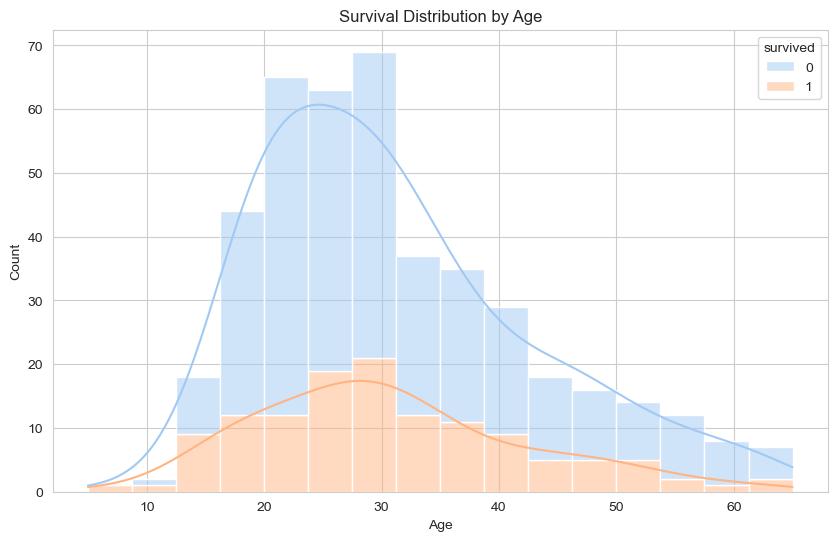

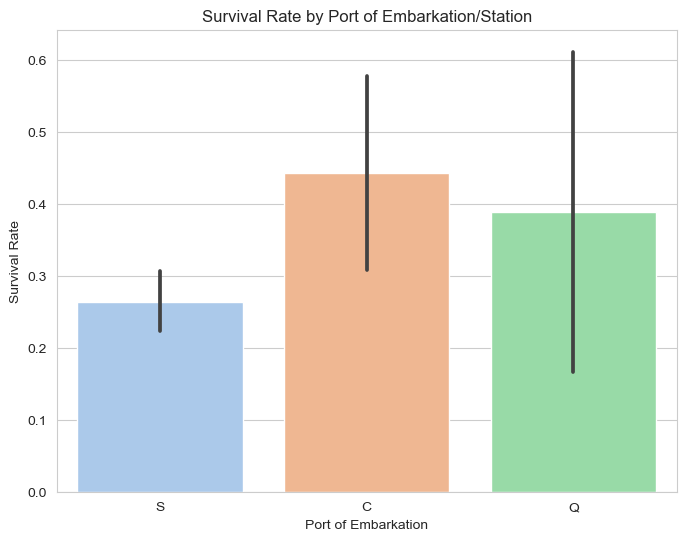

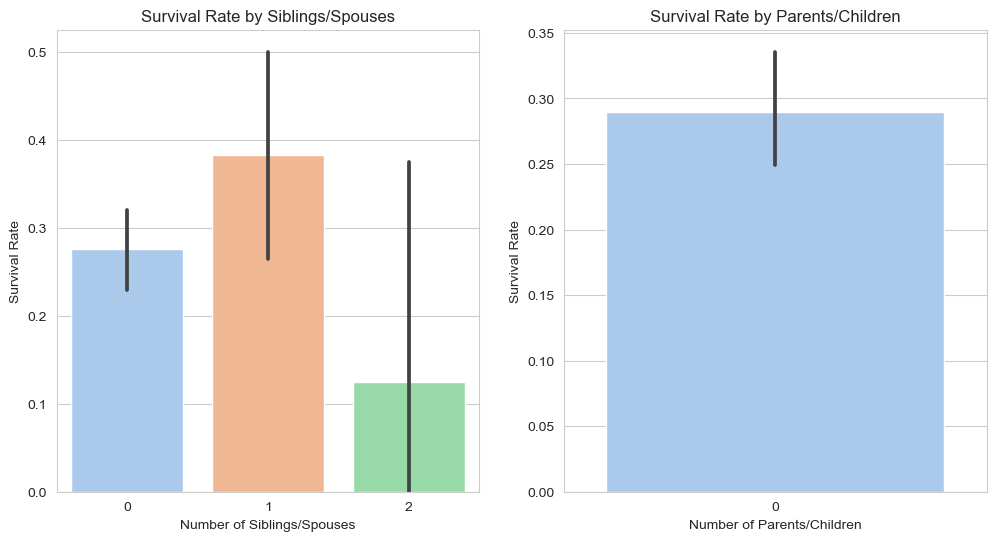

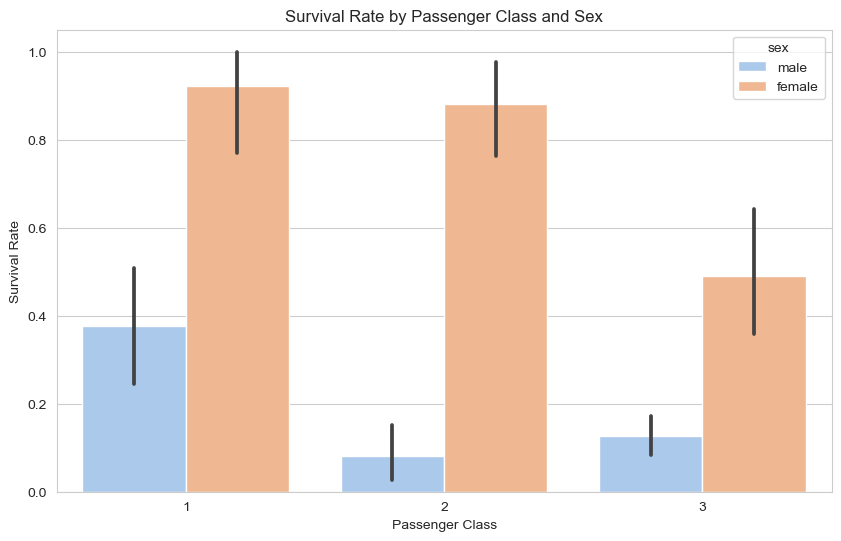

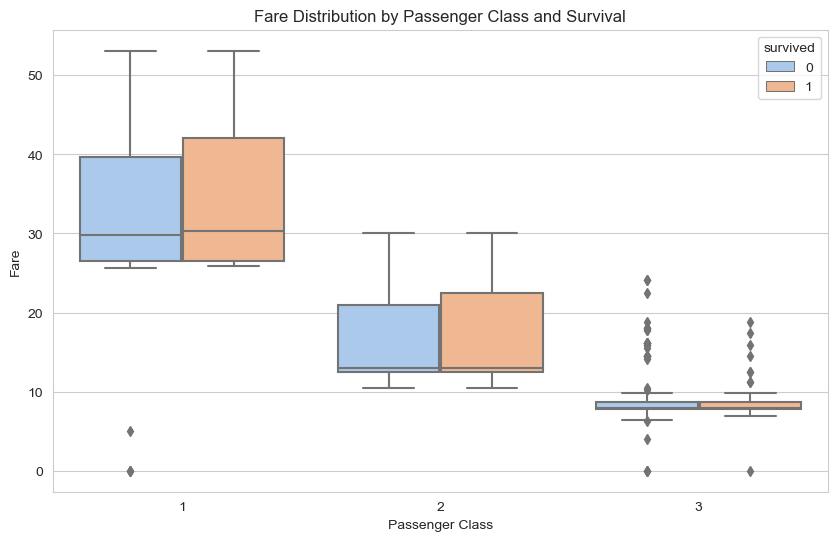

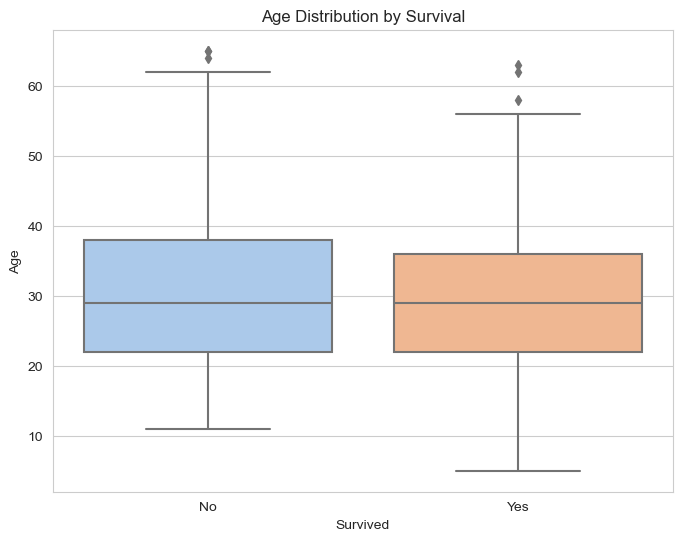

<Figure size 640x480 with 0 Axes>

In [82]:
train.plot_data()